<a href="https://colab.research.google.com/github/LaetitiaVerel/Odyssey-Quests/blob/master/Seaborn%20beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# You have now a DataFrame with lots of weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :

## First of all, you have to create a scatterplot with MAX (in red) and MIN (in blue) Temperatures on the same graph

There are lots of colors here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with MAX (in red) and MIN (in blue) Temperatures on the same graph, on Y-axis
- with Date on X-axis
- write legend, readable axis ticks, and title


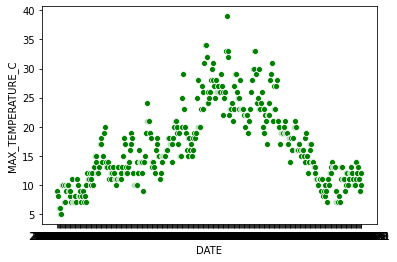

In [ ]:
# First of all, you have to create a scatterplot with MAX (in red) and MIN (in blue) Temperatures on the same graph

sns.scatterplot(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], color = 'green') 

sns.scatterplot(   ) #You have to complete this code


plt.show() # Hey ! Why this ? I'm on seaborn, not on Matplotlib ! That's true, but Seaborn is just an overlay of Matplotlib,
#            it's like a shortcut for beautiful charts.
# Of course, you'll write legend, readable axis ticks, and title.

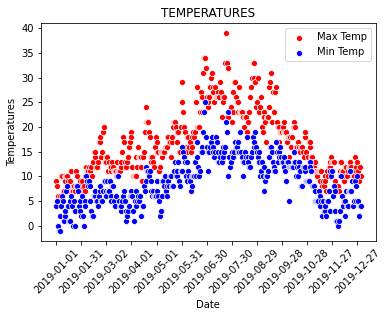

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

sns.scatterplot(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], color = 'red', label="Max Temp")
sns.scatterplot(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], color = 'blue', label="Min Temp")
plt.title("TEMPERATURES")
plt.xlabel("Date")
plt.ylabel("Temperatures")
plt.xticks(range(0,365,30), rotation=45)
plt.legend()

plt.show()

## Colorize with hue argument, to show the criterias of the opinion columns

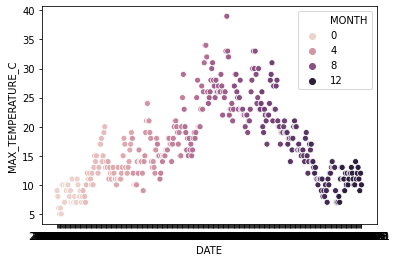

In [ ]:
# Let's try to do some stuffs, what's hue ?
sns.scatterplot(x = "DATE", y = "MAX_TEMPERATURE_C", hue = 'MONTH', data = df_weather) 
plt.show()

# Yeah, it's cool ! Did you notice that I changed a little the syntax ? I write "data =" to call the DataFrame
# Now, try to colorize, with hue, a scatterplot with MAX temperature on the X axis, PRECIPITATION (rain quantity) on the Y axis, and colorize with opinion.

# Of course, you'll write legend, readable axis ticks, and title.

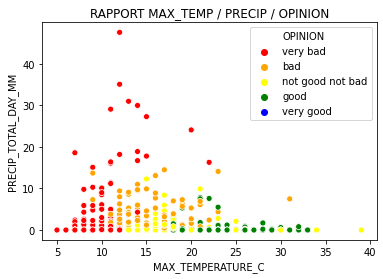

In [ ]:
sns.scatterplot(x = "MAX_TEMPERATURE_C", y = "PRECIP_TOTAL_DAY_MM", hue = 'OPINION', data = df_weather, palette={'very bad':'red', 'bad':'orange', 'not good not bad':'yellow', 'good':"green", 'very good': 'blue'})
plt.title("RAPPORT MAX_TEMP / PRECIP / OPINION")

plt.show()

## Correlation coefficient and heatmap - change the palette and interpretation

For your information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/

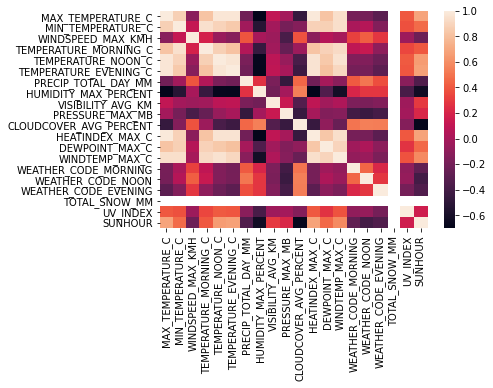

In [ ]:
# Woh ! With only one line ! Powerful !
sns.heatmap(df_weather.corr())
plt.show()
# Please change the palette (cmap) to a beautiful one.

# Hey, some columns seem to be missing. Do you understand why?


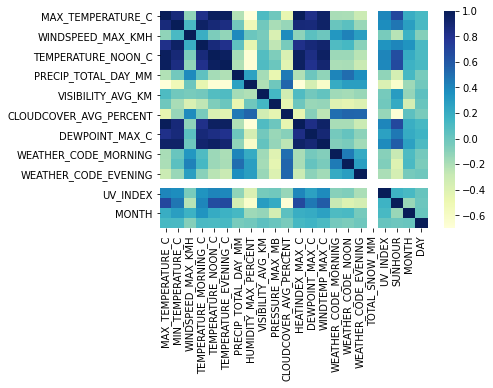

In [ ]:
sns.heatmap(df_weather.corr(), cmap="YlGnBu")

plt.show()

### Create a DataFrame with only high correlated columns with Max Temperature

In [ ]:
# Then, can you read it ? What are the most correlated columns ? 
# Print a DataFrame with only columns correlated > 0.7 OR  < -0.7 with MAX temperature.
# You could begin with this method : df_weather.corr()

In [ ]:
df_weather_corr = df_weather.corr()
df_weather_corr.loc[abs(df_weather_corr['MAX_TEMPERATURE_C']) > 0.7]

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
MAX_TEMPERATURE_C,1.000000,0.876892,-0.114510,0.825536,0.975441,0.976796,-0.210704,-0.702905,0.102422,-0.004506,-0.457853,0.993324,0.826719,0.941037,-0.190506,-0.191807,-0.301603,NaN,0.404340,0.690323,0.196215,0.123811
MIN_TEMPERATURE_C,0.876892,1.000000,0.116357,0.950702,0.888389,0.850258,-0.023004,-0.526656,-0.013555,-0.185420,-0.130853,0.880895,0.875856,0.946671,0.014212,0.057358,-0.139955,NaN,0.379809,0.471559,0.283569,0.120233
TEMPERATURE_MORNING_C,0.825536,0.950702,0.189827,1.000000,0.874102,0.814347,0.048650,-0.455566,-0.020284,-0.250654,-0.039091,0.824918,0.882306,0.924278,0.099342,0.132621,-0.096331,NaN,0.343759,0.407663,0.343293,0.121388
TEMPERATURE_NOON_C,0.975441,0.888389,-0.053186,0.874102,1.000000,0.973353,-0.175838,-0.673392,0.083209,-0.060409,-0.375154,0.963276,0.841095,0.953704,-0.146048,-0.144571,-0.235171,NaN,0.408798,0.657113,0.213586,0.112144
TEMPERATURE_EVENING_C,0.976796,0.850258,-0.121643,0.814347,0.973353,1.000000,-0.209041,-0.676409,0.096888,0.004110,-0.429395,0.963253,0.807732,0.912310,-0.196340,-0.186346,-0.294992,NaN,0.398019,0.678705,0.170397,0.124853
HUMIDITY_MAX_PERCENT,-0.702905,-0.526656,0.007739,-0.455566,-0.673392,-0.676409,0.265536,1.000000,-0.210210,-0.009099,0.541100,-0.692777,-0.344208,-0.613490,0.210244,0.283311,0.286082,NaN,-0.380635,-0.627440,-0.151859,-0.016809
HEATINDEX_MAX_C,0.993324,0.880895,-0.110249,0.824918,0.963276,0.963253,-0.206429,-0.692777,0.096070,-0.003728,-0.452330,1.000000,0.839244,0.941394,-0.187300,-0.187889,-0.303170,NaN,0.403505,0.685251,0.193336,0.130838
DEWPOINT_MAX_C,0.826719,0.875856,0.056339,0.882306,0.841095,0.807732,-0.003174,-0.344208,-0.018760,-0.141155,-0.090083,0.839244,1.000000,0.895482,-0.025249,0.024894,-0.098813,NaN,0.271352,0.463469,0.213546,0.157460
WINDTEMP_MAX_C,0.941037,0.946671,-0.000797,0.924278,0.953704,0.912310,-0.111031,-0.613490,0.031536,-0.129409,-0.245323,0.941394,0.895482,1.000000,-0.073312,-0.047806,-0.169537,NaN,0.387375,0.585079,0.274507,0.114380


## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot.

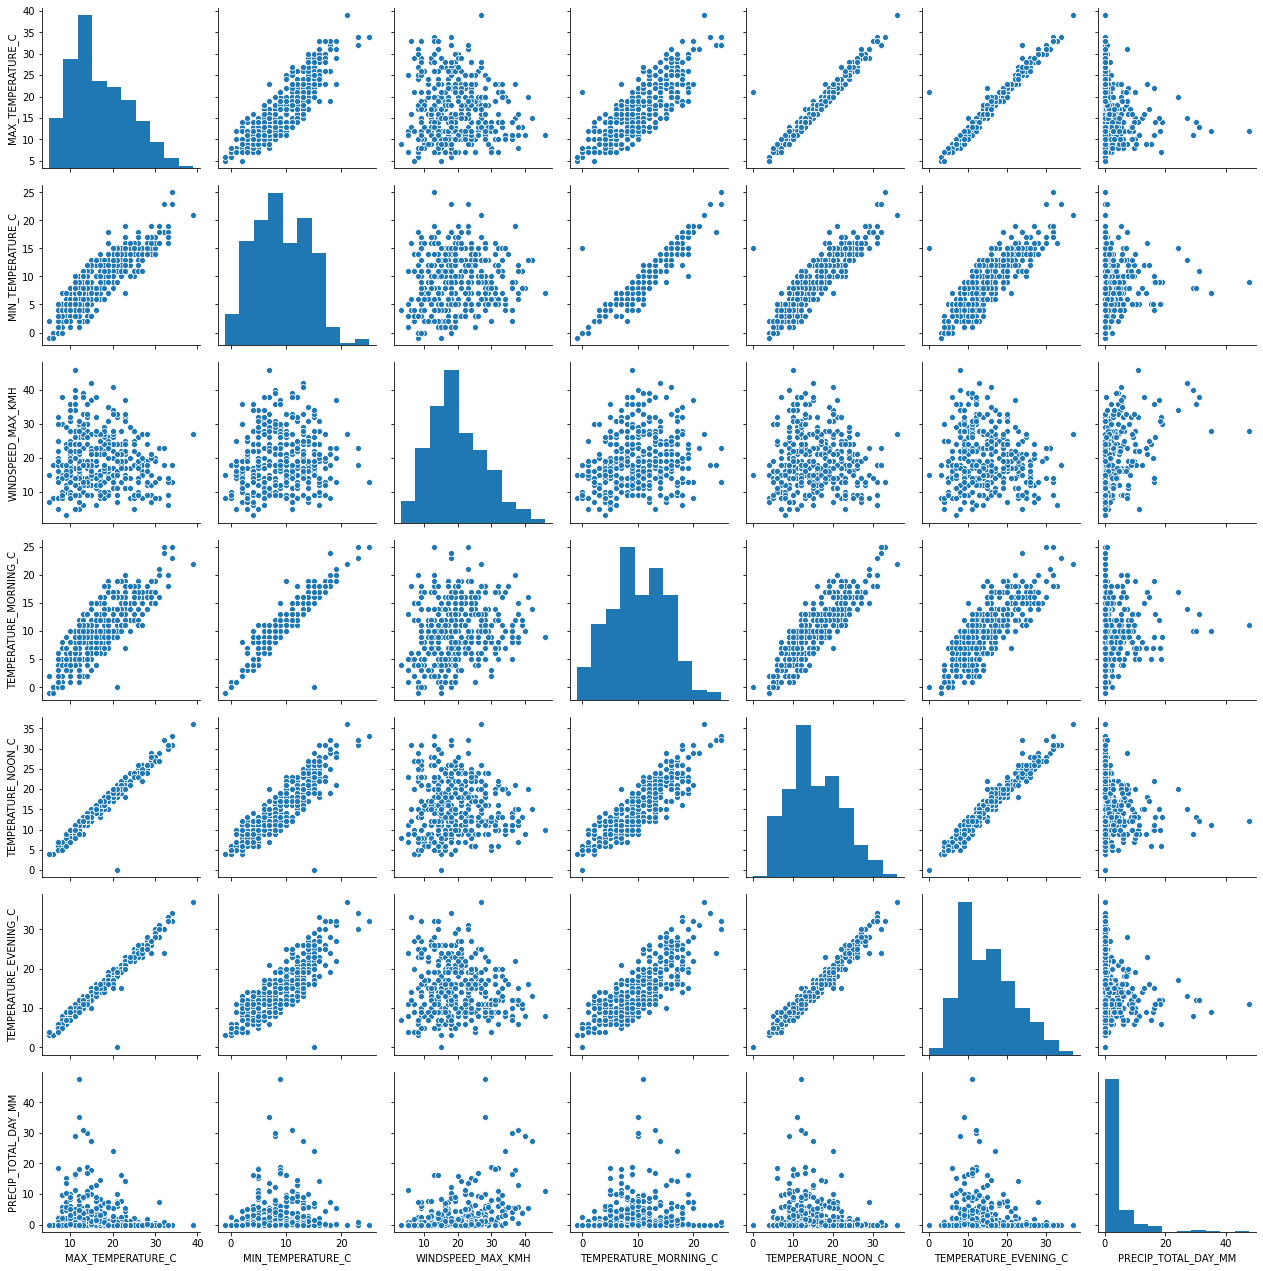

In [ ]:
# No, don't tell me it works in one line ? Of course it is!
sns.pairplot(pd.concat([df_weather.iloc[:,0:8],df_weather.iloc[:,-2]], axis = 1))
# Find a way to colorize your pairplot according to Opinion

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


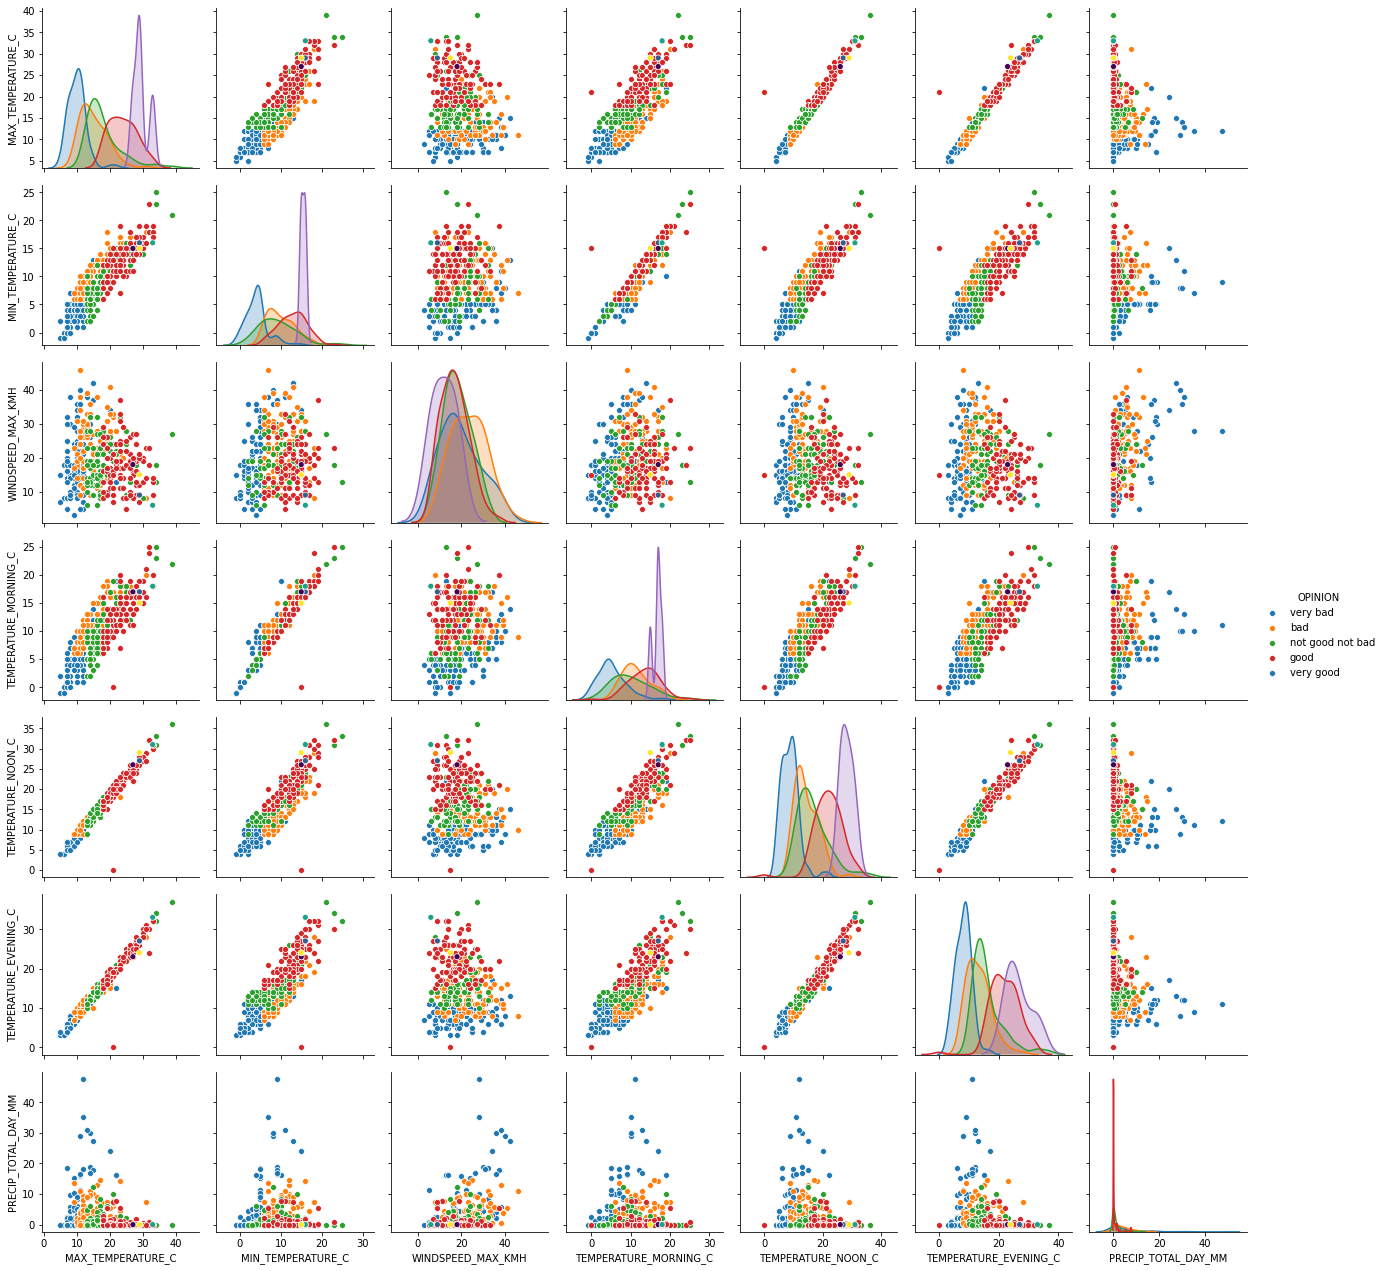

In [ ]:
memory = pd.concat([df_weather.iloc[:,0:8],df_weather.iloc[:,-3]], axis=1)

sns.pairplot(memory, hue="OPINION")

### PairPlot only with highly correlated columns with Max Temperature

In [ ]:
# Now, let's plot a pairplot with only the axis with high correlation with MAX Temperature (you have created the DataFrame above)
# And add the opinion's color, and of course a title. You can change the palette for a beautiful one.

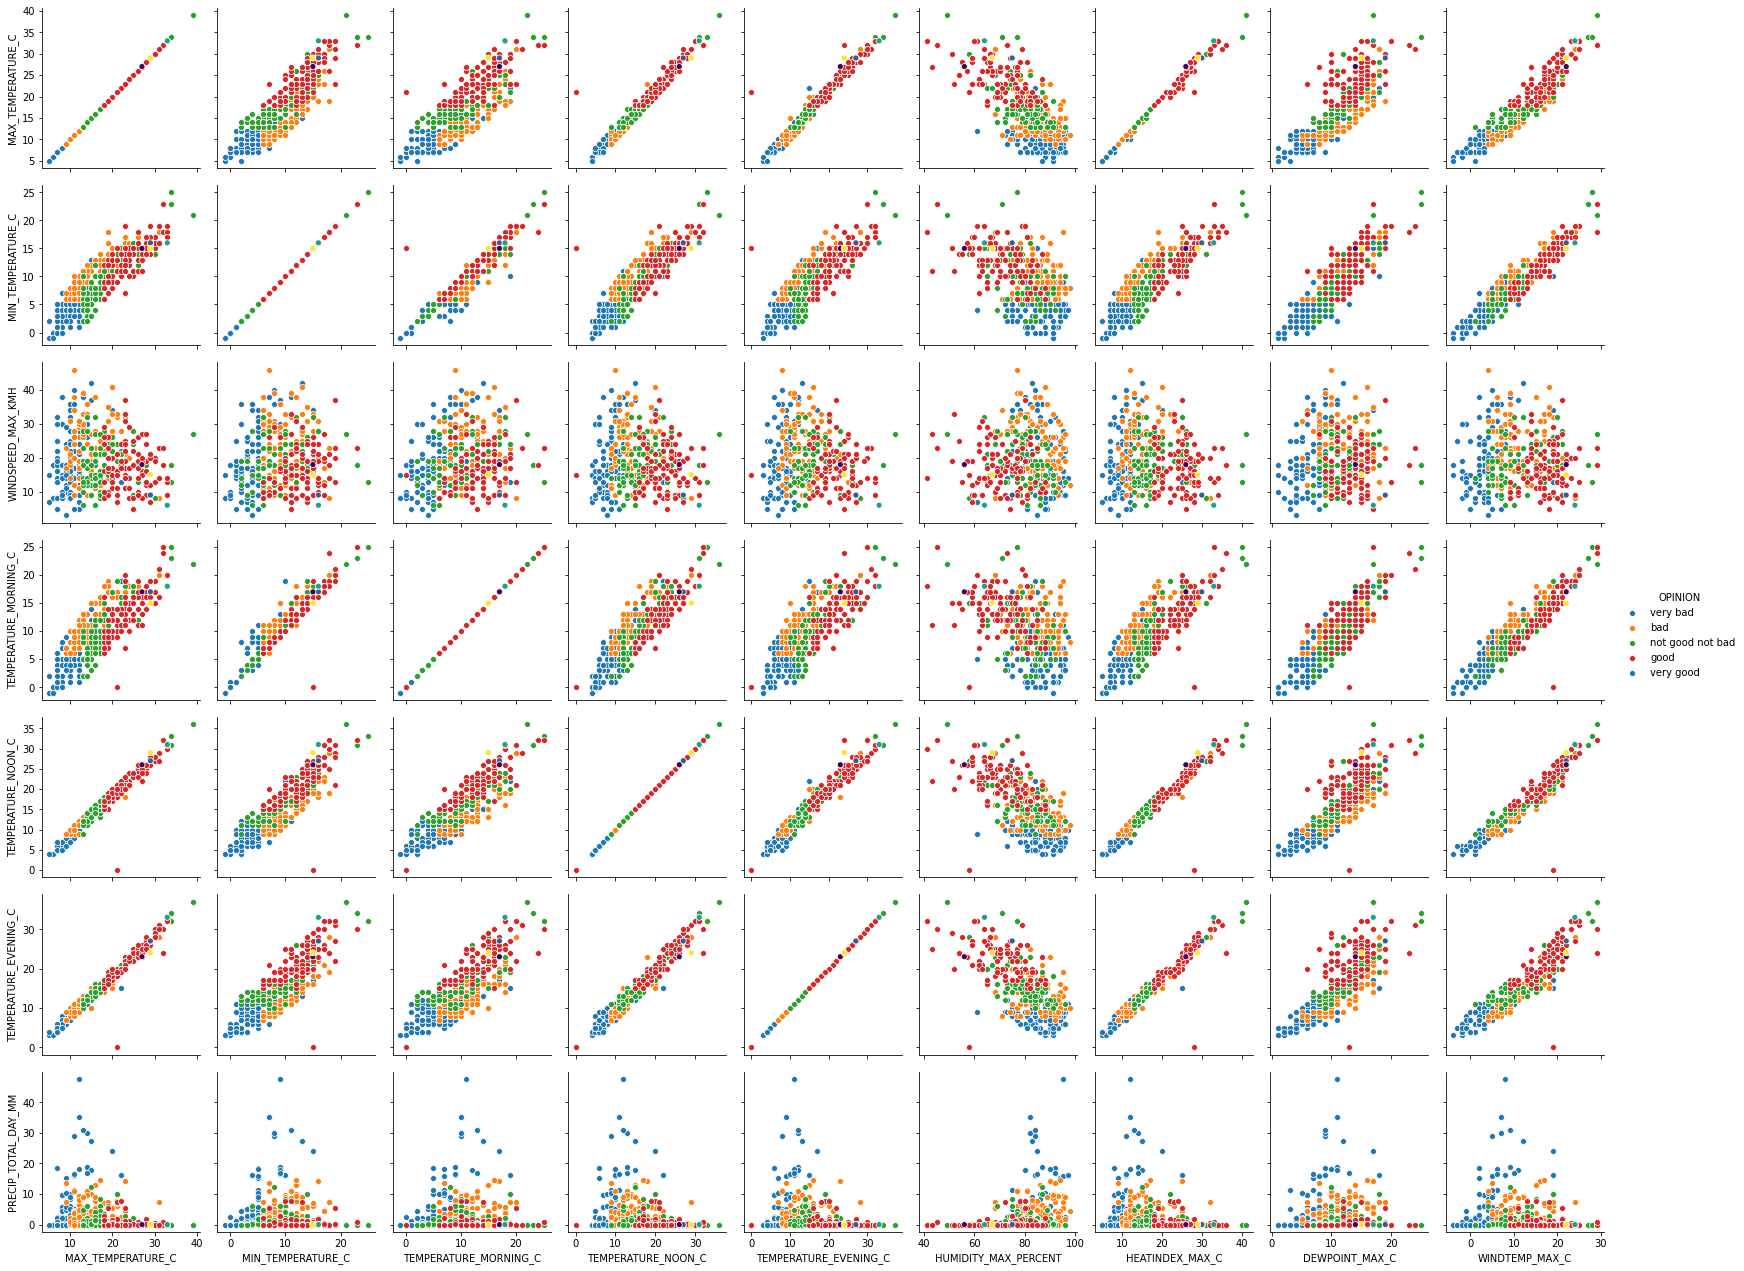

In [ ]:
df_weather_corr_pairplot = df_weather_corr.loc[abs(df_weather_corr['MAX_TEMPERATURE_C']) > 0.7]

liste = list(df_weather_corr_pairplot.index)

sns.pairplot(df_weather, hue="OPINION", x_vars=liste, y_vars=list(memory.iloc[:,1:8].columns))

## Linear regression
Change of axis, for better correlated axes of your choice

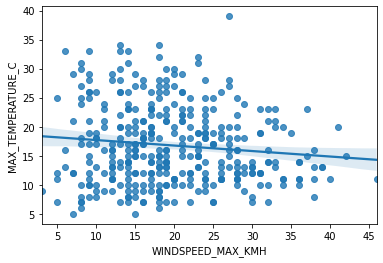

In [ ]:
# Again in one line ! 
sns.regplot('WINDSPEED_MAX_KMH', 'MAX_TEMPERATURE_C', data= df_weather)
plt.show()
# Hummmm. Yes, technicaly, it works... But MAX temperature and Windspeed don't seem well correlated...
# Hey, but you know lots of well-correlated axis. That's the moment to try !

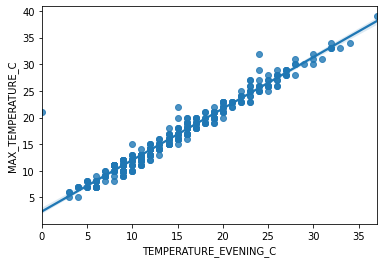

In [ ]:
sns.regplot('TEMPERATURE_EVENING_C', 'MAX_TEMPERATURE_C', data= df_weather)
plt.show()

### Linear regression with 2 columns correlated

In [ ]:
# Hop !

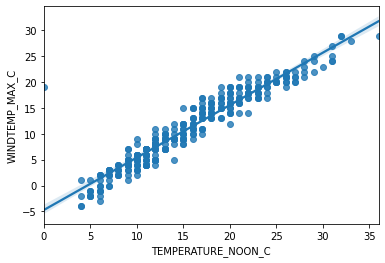

In [ ]:
sns.regplot('TEMPERATURE_NOON_C', 'WINDTEMP_MAX_C', data= df_weather)
plt.show()

# More and more...
Draw 2 different charts of your choice, on the same figure, to represent which season has the better weather.

In [ ]:
# Your code here

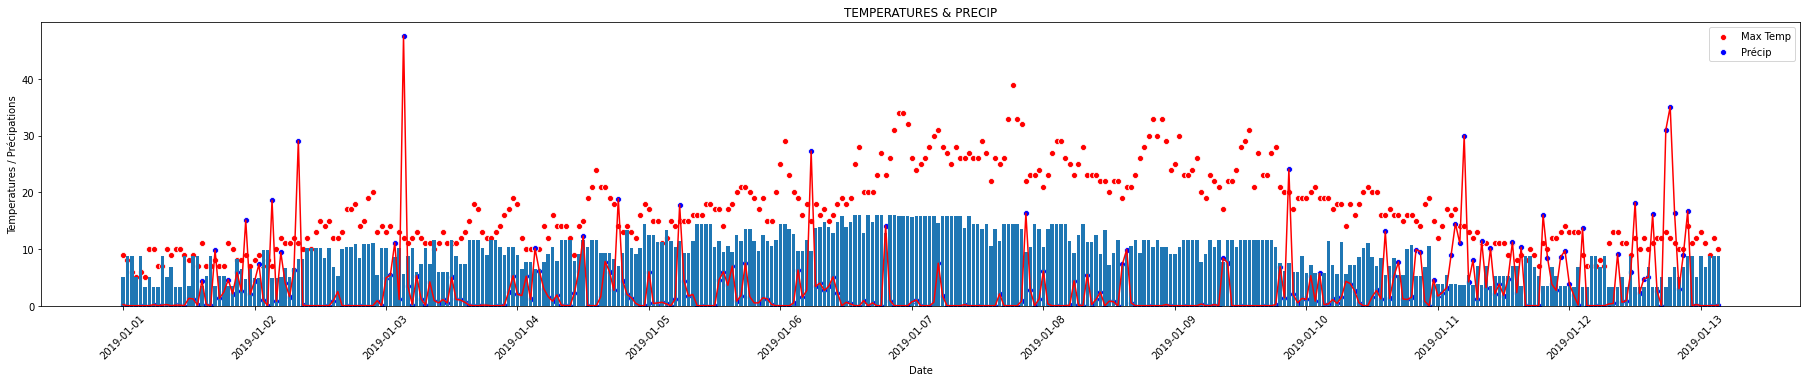

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

fig, axs = plt.subplots(1,1,figsize=(25,5))

axs = plt.subplot(111)
axs.bar(df_weather['DATE'], df_weather['SUNHOUR'])
axs.plot(df_weather['DATE'], df_weather['PRECIP_TOTAL_DAY_MM'], c="r")
axs.set_xticklabels(df_weather['DATE'], rotation=45)
axs.xaxis.set_ticks(range(0,365,30))

fig.tight_layout()
plt.show

sns.scatterplot(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], color = 'red', label="Max Temp")
sns.scatterplot(x = df_weather["DATE"], y = df_weather["PRECIP_TOTAL_DAY_MM"], color = 'blue', label="Précip")
plt.title("TEMPERATURES & PRECIP")
plt.xlabel("Date")
plt.ylabel("Temperatures / Précipations")
plt.xticks(range(0,365,30), rotation=45)
plt.legend()

plt.show()

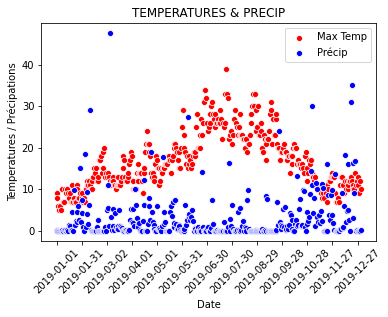

In [ ]:
sns.scatterplot(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], color = 'red', label="Max Temp")
sns.scatterplot(x = df_weather["DATE"], y = df_weather["PRECIP_TOTAL_DAY_MM"], color = 'blue', label="Précip")
plt.title("TEMPERATURES & PRECIP")
plt.xlabel("Date")
plt.ylabel("Temperatures / Précipations")
plt.xticks(range(0,365,30), rotation=45)
plt.legend()

plt.show()

# Is it the summer ? Woh, you're the best ! Now, challenge yourself with the other seaborn quests.